# add indicator

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import ta  # technical analysis library
import matplotlib.pyplot as plt

In [ ]:
file_path = r"C:\Users\amirhossein\Desktop\project of master\btcusd_1-min_data (1).csv"

# Load data
df = pd.read_csv(file_path)

# Parse timestamp
if np.issubdtype(df['Timestamp'].dtype, np.number):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
else:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df = df.set_index('Timestamp')

# Resample to 15-minute intervals
df = df.resample('15min').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
}).dropna()

df['Close'] = df['Close'].ffill()

# --- Price-based features ---
df['Return_pct'] = df['Close'].pct_change()
df['Log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['SMA_10'] = df['Close'].rolling(10).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()
df['EMA_10'] = df['Close'].ewm(span=10).mean()

# --- Volume-based features ---

# --- Technical indicators (from `ta` library) ---
df['RSI'] = ta.momentum.RSIIndicator(close=df['Close']).rsi()
bb = ta.volatility.BollingerBands(close=df['Close'])
df['BB_high'] = bb.bollinger_hband()
df['BB_low'] = bb.bollinger_lband()
macd = ta.trend.MACD(close=df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
df['Stoch_%K'] = ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close']).stoch()
df['ATR'] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close']).average_true_range()

# --- Statistical features ---
window = 20
df['Volatility'] = df['Log_return'].rolling(window).std()
df['Skewness'] = df['Log_return'].rolling(window).apply(skew)
df['Kurtosis'] = df['Log_return'].rolling(window).apply(kurtosis)
df['Autocorr'] = df['Log_return'].rolling(window).apply(lambda x: x.autocorr(lag=1))

# --- Time-based features ---
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Day'] = df.index.day
df['Is_weekend'] = (df['DayOfWeek'] >= 5).astype(int)

# --- Drop NaNs from feature creation ---
df = df.dropna()


In [ ]:
df

,Open,High,Low,Close,Return_pct,Log_return,SMA_10,SMA_50,EMA_10,RSI,...,Stoch_%K,ATR,Volatility,Skewness,Kurtosis,Autocorr,Hour,DayOfWeek,Day,Is_weekend
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-01 22:15:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.814,4.6268,4.797290,100.000000,...,100.000000,0.010265,0.012347,4.129483,15.052632,-0.055556,22,6,1,1
2012-01-01 22:30:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6320,4.805056,100.000000,...,100.000000,0.009532,0.012347,4.129483,15.052632,-0.055556,22,6,1,1
2012-01-01 22:45:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6372,4.811410,100.000000,...,100.000000,0.008851,0.012347,4.129483,15.052632,-0.055556,22,6,1,1
2012-01-01 23:00:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6424,4.816608,100.000000,...,100.000000,0.008219,0.012347,4.129483,15.052632,-0.055556,23,6,1,1
2012-01-01 23:15:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6476,4.820861,100.000000,...,100.000000,0.007632,0.012347,4.129483,15.052632,-0.055556,23,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12 23:45:00,102865.00,102964.00,102796.00,102796.00,-0.000816,-0.000817,102778.600,102856.3800,102763.592389,53.092966,...,63.369565,302.424768,0.001678,0.113664,-0.928096,0.077970,23,0,12,0
2025-05-13 00:00:00,102796.00,102796.00,102553.00,102633.00,-0.001586,-0.001587,102787.300,102825.7200,102739.848318,49.406238,...,35.149157,298.180142,0.001722,0.278083,-0.957617,0.180257,0,1,13,0
2025-05-13 00:15:00,102582.00,102660.00,102434.00,102500.00,-0.001296,-0.001297,102784.700,102800.2000,102696.239533,46.564971,...,17.898833,293.024417,0.001696,0.304704,-0.929454,0.184104,0,1,13,0


In [ ]:
from scipy.signal import find_peaks

def extract_pivots(prices, prominence=0.01, distance=5):
    # Peaks
    peaks, _ = find_peaks(prices, prominence=prominence, distance=distance)
    # Troughs by inverting the series
    troughs, _ = find_peaks(-prices, prominence=prominence, distance=distance)
    
    # Merge and sort
    pivot_idx = np.sort(np.concatenate((peaks, troughs)))
    pivot_values = prices[pivot_idx]
    
    return pivot_idx, pivot_values

def identify_impulse_waves(pivot_idx, pivot_values, min_ratio=1.3, tolerance=0.15):
    """
    Receive a list of pivot points and return valid impulse waves 1 to 5
    """
    valid_patterns = []
    for i in range(len(pivot_idx) - 4):
        i1, i2, i3, i4, i5 = pivot_idx[i:i+5]
        p1, p2, p3, p4, p5 = pivot_values[i:i+5]

        # Overall direction (upward or downward)
        direction = 1 if p5 > p1 else -1

        # Wave lengths
        w1 = abs(p2 - p1)
        w2 = abs(p3 - p2)
        w3 = abs(p4 - p3)
        w4 = abs(p5 - p4)

        # Elliott Wave rules
        cond1 = w3 >= min_ratio * w1  # Wave 3 must be larger
        cond2 = direction * (p2 - p1) > 0  # Wave 1 is upward
        cond3 = direction * (p4 - p3) < 0  # Wave 4 is corrective
        cond4 = direction * (p5 - p1) > 0  # Wave 5 continues the trend

        if all([cond1, cond2, cond3, cond4]):
            valid_patterns.append((i1, i2, i3, i4, i5))
    return valid_patterns


def label_wave_pattern(price_series, valid_patterns):
    labels = np.zeros(len(price_series))
    for wave in valid_patterns:
        for idx, label in zip(wave, [1, 2, 3, 4, 5]):
            labels[idx] = label
    return labels


prices = df['Close'].values

# Extract peaks and troughs
pivot_idx, pivot_vals = extract_pivots(prices, prominence=0.01)

# Identify valid 1 to 5 wave patterns
valid_impulses = identify_impulse_waves(pivot_idx, prices[pivot_idx])

# Create labels
wave_labels = label_wave_pattern(prices, valid_impulses)

# Add to DataFrame
df['Wave_Label'] = wave_labels

In [ ]:
df

,Open,High,Low,Close,Return_pct,Log_return,SMA_10,SMA_50,EMA_10,RSI,...,ATR,Volatility,Skewness,Kurtosis,Autocorr,Hour,DayOfWeek,Day,Is_weekend,Wave_Label
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-01 22:15:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.814,4.6268,4.797290,100.000000,...,0.010265,0.012347,4.129483,15.052632,-0.055556,22,6,1,1,0.0
2012-01-01 22:30:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6320,4.805056,100.000000,...,0.009532,0.012347,4.129483,15.052632,-0.055556,22,6,1,1,0.0
2012-01-01 22:45:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6372,4.811410,100.000000,...,0.008851,0.012347,4.129483,15.052632,-0.055556,22,6,1,1,0.0
2012-01-01 23:00:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6424,4.816608,100.000000,...,0.008219,0.012347,4.129483,15.052632,-0.055556,23,6,1,1,0.0
2012-01-01 23:15:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6476,4.820861,100.000000,...,0.007632,0.012347,4.129483,15.052632,-0.055556,23,6,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12 23:45:00,102865.00,102964.00,102796.00,102796.00,-0.000816,-0.000817,102778.600,102856.3800,102763.592389,53.092966,...,302.424768,0.001678,0.113664,-0.928096,0.077970,23,0,12,0,0.0
2025-05-13 00:00:00,102796.00,102796.00,102553.00,102633.00,-0.001586,-0.001587,102787.300,102825.7200,102739.848318,49.406238,...,298.180142,0.001722,0.278083,-0.957617,0.180257,0,1,13,0,0.0
2025-05-13 00:15:00,102582.00,102660.00,102434.00,102500.00,-0.001296,-0.001297,102784.700,102800.2000,102696.239533,46.564971,...,293.024417,0.001696,0.304704,-0.929454,0.184104,0,1,13,0,0.0


In [ ]:
def plot_wave_labels(df, price_col='Close', label_col='Wave_Label'):
    plt.figure(figsize=(15, 6))
    plt.plot(df[price_col], label='Close Price', linewidth=1.2)

    wave_colors = {
        1: 'blue',
        2: 'orange',
        3: 'green',
        4: 'red',
        5: 'purple',
    }

    for idx, row in df.iterrows():
        label = row[label_col]
        if label in wave_colors:
            plt.scatter(idx, row[price_col], color=wave_colors[label], s=60, label=f'Wave {int(label)}')
            plt.text(idx, row[price_col]*1.01, f'{int(label)}', fontsize=9, ha='center', color=wave_colors[label])

    plt.title("Elliott Wave Labeling on Price")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.grid(True)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # جلوگیری از تکرار در legend
    plt.legend(by_label.values(), by_label.keys())
    plt.tight_layout()
    plt.show()


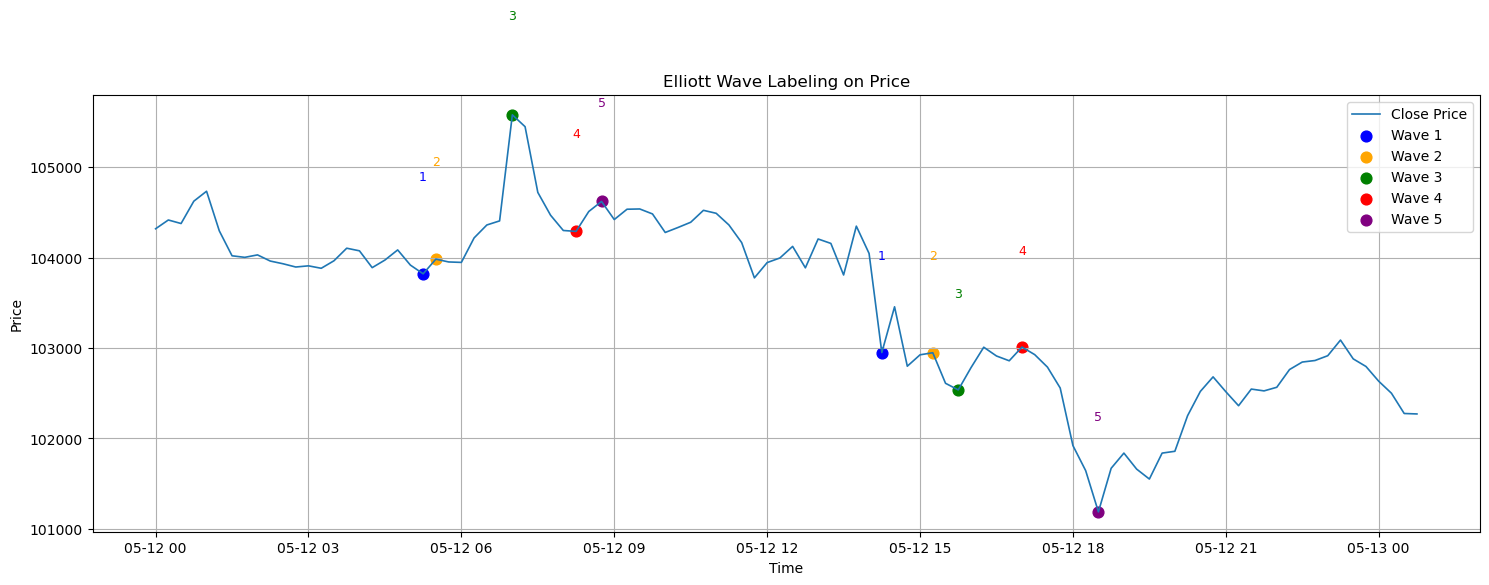

In [ ]:
plot_wave_labels(df.iloc[-100:])  

In [ ]:
# استخراج اطلاعات نقاط برچسب‌دار (موج 1 تا 5)
wave_points = df[df['Wave_Label'].isin([1, 2, 3, 4, 5])].copy()

# اضافه کردن ایندکس زمانی به عنوان ستون
wave_points['Time'] = wave_points.index

# مرتب‌سازی بر اساس شماره موج
wave_points_sorted = wave_points[['Wave_Label', 'Time', 'Close']].sort_values(by='Wave_Label')

# نمایش جدول نهایی
print(wave_points_sorted)

                     Wave_Label                Time      Close
Timestamp                                                     
2012-02-17 12:45:00         1.0 2012-02-17 12:45:00       4.79
2017-09-15 18:15:00         1.0 2017-09-15 18:15:00    3553.89
2017-09-17 22:30:00         1.0 2017-09-17 22:30:00    3698.00
2017-09-18 18:45:00         1.0 2017-09-18 18:45:00    4020.00
2017-09-18 19:30:00         1.0 2017-09-18 19:30:00    4053.03
...                         ...                 ...        ...
2019-10-08 08:00:00         5.0 2019-10-08 08:00:00    8303.94
2019-10-08 19:00:00         5.0 2019-10-08 19:00:00    8216.43
2019-10-09 20:30:00         5.0 2019-10-09 20:30:00    8606.85
2019-10-10 18:30:00         5.0 2019-10-10 18:30:00    8497.67
2025-05-12 18:30:00         5.0 2025-05-12 18:30:00  101188.00

[31947 rows x 3 columns]


In [ ]:
# استخراج فقط امواج 1 تا 5
wave_points = df[df['Wave_Label'].isin([1, 2, 3, 4, 5])].copy()

# اضافه کردن ایندکس زمانی به عنوان ستون مجزا
wave_points['Time'] = wave_points.index

# مرتب‌سازی بر اساس زمان (نه شماره موج)
wave_points_sorted = wave_points[['Wave_Label', 'Time', 'Close']].sort_values(by='Time')

# گرفتن ۲۰ موج آخر
last_20_waves = wave_points_sorted.tail(20).reset_index(drop=True)

# نمایش
print(last_20_waves)


    Wave_Label                Time     Close
0          1.0 2025-05-11 12:00:00  104829.0
1          2.0 2025-05-11 12:30:00  104588.0
2          3.0 2025-05-11 14:15:00  103940.0
3          4.0 2025-05-11 15:00:00  104530.0
4          5.0 2025-05-11 16:15:00  104094.0
5          1.0 2025-05-11 19:00:00  104616.0
6          2.0 2025-05-11 20:15:00  104424.0
7          3.0 2025-05-11 21:00:00  104054.0
8          4.0 2025-05-11 21:45:00  104383.0
9          5.0 2025-05-11 22:30:00  103621.0
10         1.0 2025-05-12 05:15:00  103821.0
11         2.0 2025-05-12 05:30:00  103983.0
12         3.0 2025-05-12 07:00:00  105579.0
13         4.0 2025-05-12 08:15:00  104290.0
14         5.0 2025-05-12 08:45:00  104621.0
15         1.0 2025-05-12 14:15:00  102950.0
16         2.0 2025-05-12 15:15:00  102948.0
17         3.0 2025-05-12 15:45:00  102537.0
18         4.0 2025-05-12 17:00:00  103011.0
19         5.0 2025-05-12 18:30:00  101188.0


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema

close = df['Close']

# ---------- 3. شناسایی سقف و کف با ZigZag ----------
from scipy.signal import argrelextrema

def detect_peaks(data, order=10):
    maxima = argrelextrema(data.values, np.greater_equal, order=order)[0]
    minima = argrelextrema(data.values, np.less_equal, order=order)[0]
    pivots = np.sort(np.concatenate((maxima, minima)))
    return pivots

def label_elliott_waves_strict(df, pivots):
    rows = []
    i = 0
    while i + 4 < len(pivots):
        p = pivots[i:i+5]
        prices = df['Close'].iloc[p].values

        if (
            (prices[1] < prices[0]) and
            (prices[2] < prices[1]) and
            (prices[3] > prices[2]) and
            (prices[4] < prices[3]) and
            (prices[2] < prices[0]) and
            (prices[3] < prices[1]) and
            (prices[4] < prices[2])
        ):
            for wave_num, idx in zip(range(1, 6), p):
                row = df.iloc[idx].copy()
                row['Wave_Label'] = wave_num
                rows.append(row)
            i += 5
        else:
            i += 1

    wave_df = pd.DataFrame(rows)
    wave_df.reset_index(inplace=True)  
    return wave_df

pivots = detect_peaks(df['Close'], order=10)
wave_df = label_elliott_waves_strict(df, pivots)
print(wave_df.tail(20))


                   index     Open     High      Low    Close  Return_pct  \
1245 2025-03-06 10:15:00  90988.0  91649.0  90943.0  91624.0    0.007134   
1246 2025-03-06 15:30:00  90831.0  91442.0  90662.0  91205.0    0.003620   
1247 2025-03-06 19:15:00  88299.0  88333.0  88051.0  88062.0   -0.002695   
1248 2025-03-06 22:00:00  89886.0  90777.0  89886.0  90477.0    0.006698   
1249 2025-03-07 00:45:00  85936.0  85936.0  84713.0  85493.0   -0.005410   
1250 2025-03-21 01:45:00  84519.0  84738.0  84462.0  84735.0    0.002568   
1251 2025-03-21 04:30:00  84646.0  84743.0  84644.0  84706.0    0.000673   
1252 2025-03-21 07:30:00  84040.0  84040.0  83713.0  83740.0   -0.003582   
1253 2025-03-21 12:15:00  84179.0  84297.0  84113.0  84220.0    0.000808   
1254 2025-03-21 12:45:00  83758.0  83862.0  83358.0  83435.0   -0.003844   
1255 2025-03-27 21:30:00  87372.0  87702.0  87372.0  87617.0    0.002804   
1256 2025-03-28 01:30:00  87148.0  87481.0  87108.0  87481.0    0.003821   
1257 2025-03

In [ ]:
wave_df

,index,Open,High,Low,Close,Return_pct,Log_return,SMA_10,SMA_50,EMA_10,...,ATR,Volatility,Skewness,Kurtosis,Autocorr,Hour,DayOfWeek,Day,Is_weekend,Wave_Label
0,2012-07-03 14:00:00,6.65,6.65,6.65,6.65,0.000000,0.000000,6.643,6.6068,6.639861,...,0.013891,0.004019,0.273633,3.565590,-0.334777,14.0,1.0,3.0,0.0,1.0
1,2012-07-03 16:45:00,6.64,6.64,6.64,6.64,0.000000,0.000000,6.617,6.6164,6.627263,...,0.014618,0.004591,0.168926,1.463570,-0.389049,16.0,1.0,3.0,0.0,2.0
2,2012-07-03 18:15:00,6.48,6.48,6.45,6.45,-0.006163,-0.006182,6.557,6.6038,6.535030,...,0.027158,0.004979,-1.119646,3.142894,-0.144624,18.0,1.0,3.0,0.0,3.0
3,2012-07-03 22:00:00,6.51,6.51,6.51,6.51,0.000000,0.000000,6.505,6.5760,6.509502,...,0.017395,0.004150,0.757154,1.419127,-0.235330,22.0,1.0,3.0,0.0,4.0
4,2012-07-03 22:15:00,6.51,6.51,6.40,6.40,-0.016897,-0.017041,6.494,6.5722,6.489593,...,0.024009,0.005610,-0.695434,2.294619,-0.180474,22.0,1.0,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,2025-04-06 08:15:00,82854.00,82870.00,82714.00,82715.00,-0.001678,-0.001679,83086.100,83239.8000,83036.459553,...,123.625963,0.001041,-0.412977,-1.014341,-0.034148,8.0,6.0,6.0,1.0,1.0
1261,2025-04-06 13:45:00,82460.00,82460.00,82219.00,82276.00,-0.002243,-0.002246,82652.500,83053.0200,82602.291725,...,157.586177,0.001295,0.028050,-0.189389,-0.203745,13.0,6.0,6.0,1.0,2.0
1262,2025-04-06 23:15:00,77692.00,77747.00,77098.00,77373.00,-0.003824,-0.003831,78541.900,80883.8000,78369.830401,...,575.574059,0.003559,-0.217465,0.024683,-0.006063,23.0,6.0,6.0,1.0,3.0
1263,2025-04-07 01:45:00,78658.00,79175.00,78633.00,79094.00,0.005530,0.005515,78383.000,80015.6600,78558.092008,...,626.837683,0.006120,-0.002336,-0.422274,-0.292202,1.0,0.0,7.0,0.0,4.0


In [ ]:
def detect_impulse_waves(df, distance=6):
    price_series = df['Close']
    
    # یافتن مینیمم‌ها و ماکزیمم‌ها
    local_min = argrelextrema(price_series.values, np.less_equal, order=distance)[0]
    local_max = argrelextrema(price_series.values, np.greater_equal, order=distance)[0]
    extrema_indices = np.sort(np.concatenate((local_min, local_max)))

    selected_rows = []
    wave_labels = []
    idx = 0

    while idx + 4 < len(extrema_indices):
        i1, i2, i3, i4, i5 = extrema_indices[idx:idx+5]
        p1, p2, p3, p4, p5 = price_series.iloc[[i1, i2, i3, i4, i5]]

        # موج نزولی
        if (
            p2 > p1 and
            p3 < p2 and (p1 - p3) > (p1 - p2) and
            p4 > p3 and p4 < p2 and
            p5 < p4 and p5 < p3
        ):
            for wave_num, i in zip([1, 2, 3, 4, 5], [i1, i2, i3, i4, i5]):
                row = df.iloc[i].copy()
                row['Wave_Label'] = wave_num
                selected_rows.append(row)
            idx += 5
            continue

        # موج صعودی
        if (
            p2 < p1 and
            p3 > p2 and (p3 - p1) > (p2 - p1) and
            p4 < p3 and p4 > p2 and
            p5 > p4 and p5 > p3
        ):
            for wave_num, i in zip([1, 2, 3, 4, 5], [i1, i2, i3, i4, i5]):
                row = df.iloc[i].copy()
                row['Wave_Label'] = wave_num
                selected_rows.append(row)
            idx += 5
            continue

        idx += 1

    result = pd.DataFrame(selected_rows)
    result.reset_index(inplace=True)  # اختیاری: برای حفظ ایندکس زمانی

    return result


In [ ]:
print(wave_df.columns)


Index(['index', 'Open', 'High', 'Low', 'Close', 'Return_pct', 'Log_return',
       'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'BB_high', 'BB_low', 'MACD',
       'MACD_signal', 'Stoch_%K', 'ATR', 'Volatility', 'Skewness', 'Kurtosis',
       'Autocorr', 'Hour', 'DayOfWeek', 'Day', 'Is_weekend', 'Wave_Label'],
      dtype='object')


C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\2449176248.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\amirhossein\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


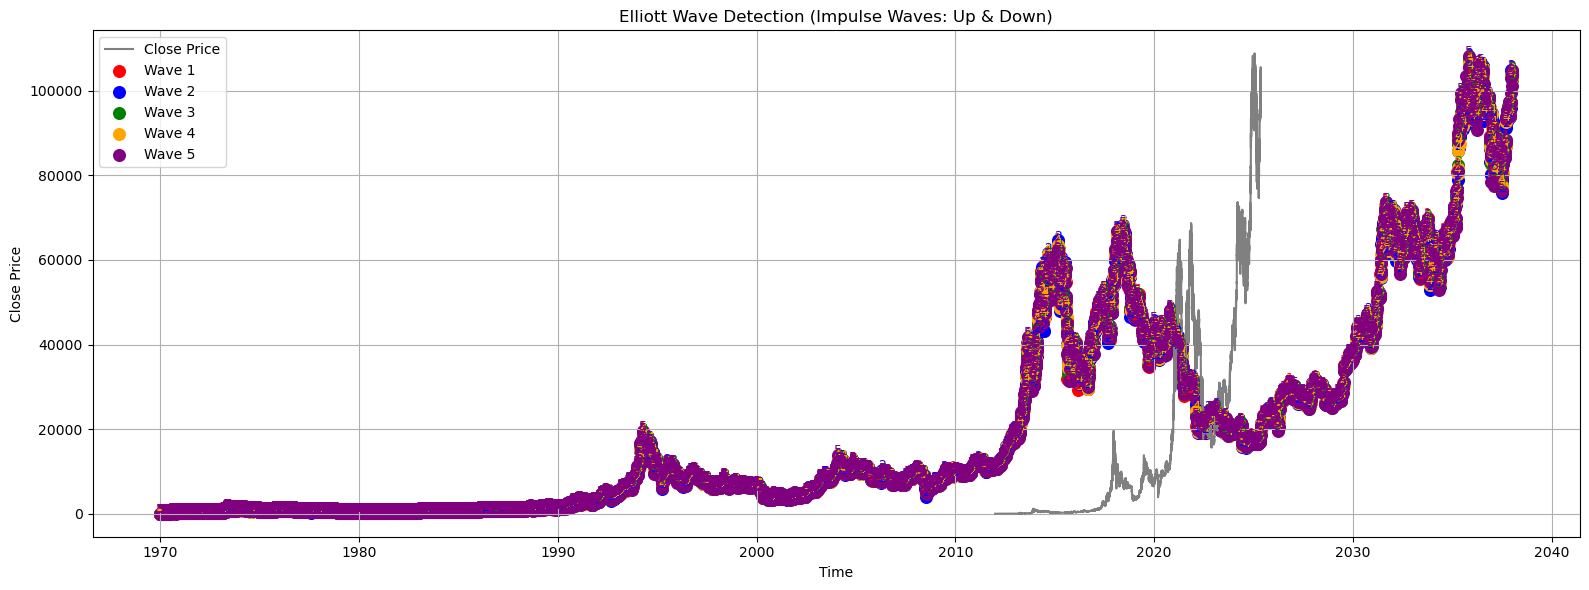

In [ ]:

wave_df = detect_impulse_waves(df, distance=6)

In [ ]:
last_20_waves = wave_df.tail(20)
print(last_20_waves)


                    index      Open      High       Low     Close  Return_pct  \
24825 2025-05-10 20:45:00  103304.0  103330.0  103169.0  103201.0   -0.000997   
24826 2025-05-10 23:15:00  103982.0  104985.0  103982.0  104857.0    0.008425   
24827 2025-05-11 02:45:00  104061.0  104134.0  103489.0  103763.0   -0.002864   
24828 2025-05-11 04:00:00  104010.0  104400.0  104010.0  104330.0    0.002739   
24829 2025-05-11 07:45:00  103446.0  103606.0  103369.0  103403.0   -0.000725   
24830 2025-05-11 12:00:00  104681.0  104884.0  104643.0  104829.0    0.001576   
24831 2025-05-11 14:15:00  103974.0  104080.0  103832.0  103940.0   -0.000337   
24832 2025-05-11 15:00:00  104182.0  104569.0  104116.0  104530.0    0.003225   
24833 2025-05-11 18:00:00  104063.0  104124.0  103918.0  103953.0   -0.000932   
24834 2025-05-11 19:00:00  104564.0  104681.0  104457.0  104616.0    0.000497   
24835 2025-05-11 22:30:00  103973.0  104053.0  103621.0  103621.0   -0.003385   
24836 2025-05-12 01:00:00  1

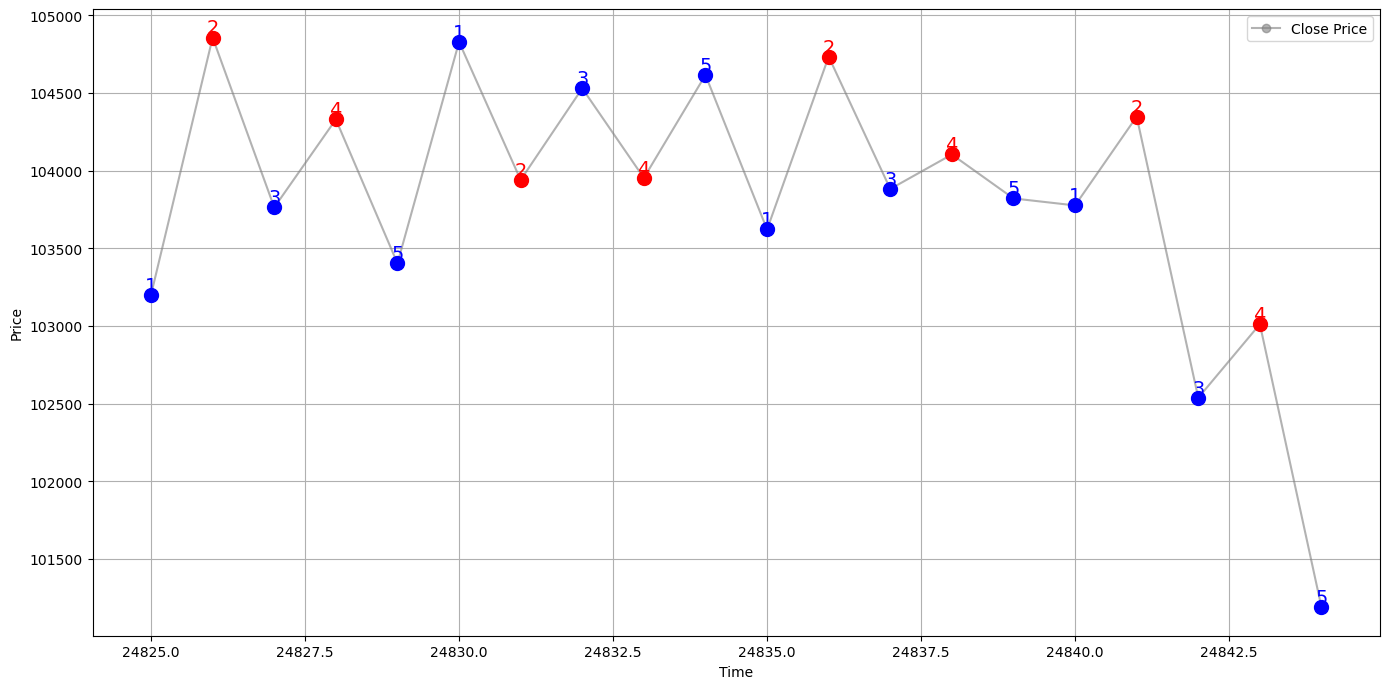

In [ ]:
last_20 = wave_df.tail(20)

plt.figure(figsize=(14, 7))
plt.plot(last_20.index, last_20['Close'], label='Close Price', color='gray', alpha=0.6, marker='o')

for i, row in last_20.iterrows():
    label = row['Wave_Label']
    time = row.name  # ← استفاده از index به جای ستون Time
    price = row['Close']

    if label in [1, 3, 5]:
        color = 'blue'
    elif label in [2, 4]:
        color = 'red'
    else:
        color = 'green'

    plt.scatter(time, price, color=color, s=100, zorder=5)
    plt.text(time, price, str(int(label)), fontsize=14, ha='center', va='bottom', color=color)

plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# گرفتن 20 موج آخر (مثل قبل)
last_20 = wave_df.loc[26430:26449].copy()

# چاپ جزییات هر موج به صورت خط به خط
for idx, row in last_20.iterrows():
    print(f"Wave_Label: {int(row['Wave_Label'])}, Time: {row['Time']}, Close: {row['Close']:.2f}")


In [ ]:
df

,Open,High,Low,Close,Return_pct,Log_return,SMA_10,SMA_50,EMA_10,RSI,...,ATR,Volatility,Skewness,Kurtosis,Autocorr,Hour,DayOfWeek,Day,Is_weekend,Wave_Label
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-01 22:15:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.814,4.6268,4.797290,100.000000,...,0.010265,0.012347,4.129483,15.052632,-0.055556,22,6,1,1,0.0
2012-01-01 22:30:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6320,4.805056,100.000000,...,0.009532,0.012347,4.129483,15.052632,-0.055556,22,6,1,1,0.0
2012-01-01 22:45:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6372,4.811410,100.000000,...,0.008851,0.012347,4.129483,15.052632,-0.055556,22,6,1,1,0.0
2012-01-01 23:00:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6424,4.816608,100.000000,...,0.008219,0.012347,4.129483,15.052632,-0.055556,23,6,1,1,0.0
2012-01-01 23:15:00,4.84,4.84,4.84,4.84,0.000000,0.000000,4.840,4.6476,4.820861,100.000000,...,0.007632,0.012347,4.129483,15.052632,-0.055556,23,6,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12 23:45:00,102865.00,102964.00,102796.00,102796.00,-0.000816,-0.000817,102778.600,102856.3800,102763.592389,53.092966,...,302.424768,0.001678,0.113664,-0.928096,0.077970,23,0,12,0,0.0
2025-05-13 00:00:00,102796.00,102796.00,102553.00,102633.00,-0.001586,-0.001587,102787.300,102825.7200,102739.848318,49.406238,...,298.180142,0.001722,0.278083,-0.957617,0.180257,0,1,13,0,0.0
2025-05-13 00:15:00,102582.00,102660.00,102434.00,102500.00,-0.001296,-0.001297,102784.700,102800.2000,102696.239533,46.564971,...,293.024417,0.001696,0.304704,-0.929454,0.184104,0,1,13,0,0.0


In [ ]:
import pandas as pd

wave_df['Time'] = wave_df.index


# فرض می‌کنیم df دیتافریم اصلی شماست
# ابتدا 20 تای آخر رو برمی‌داریم
df_last_20 = wave_df.tail(20).reset_index(drop=True)

# چک 1: ترتیب موج‌ها و زمان
correct_order = True
for i in range(len(df_last_20)-1):
    current_wave = df_last_20.loc[i, 'Wave_Label']
    next_wave = df_last_20.loc[i+1, 'Wave_Label']
    current_time = df_last_20.loc[i, 'Time']
    next_time = df_last_20.loc[i+1, 'Time']

    expected_next_wave = 1 if current_wave == 5 else current_wave + 1

    if next_wave != expected_next_wave:
        print(f"خطا: ترتیب موج‌ها رعایت نشده بین index {i} و {i+1} ({current_wave} -> {next_wave})")
        correct_order = False

    if next_time <= current_time:
        print(f"خطا: زمان کاهش یافته بین index {i} و {i+1} ({current_time} -> {next_time})")
        correct_order = False

if correct_order:
    print("ترتیب زمانی و عددی موج‌ها صحیح است.")

# چک 2: منطق قیمت‌ها (موج صعودی و اصلاحی)
price_logic_ok = True
for i in range(len(df_last_20)-1):
    current_wave = df_last_20.loc[i, 'Wave_Label']
    current_price = df_last_20.loc[i, 'Close']
    next_price = df_last_20.loc[i+1, 'Close']

    if current_wave in [1, 3, 5]:  # موج صعودی باید قیمت افزایشی داشته باشد
        if next_price <= current_price:
            print(f"خطا: قیمت موج صعودی بعدی کاهش یافته بین index {i} و {i+1} ({current_price} -> {next_price})")
            price_logic_ok = False
    elif current_wave in [2, 4]:  # موج اصلاحی باید قیمت کاهشی داشته باشد
        if next_price >= current_price:
            print(f"خطا: قیمت موج اصلاحی بعدی افزایش یافته بین index {i} و {i+1} ({current_price} -> {next_price})")
            price_logic_ok = False

if price_logic_ok:
    print("قوانین قیمت برای امواج رعایت شده‌اند.")


ترتیب زمانی و عددی موج‌ها صحیح است.
خطا: قیمت موج صعودی بعدی کاهش یافته بین index 5 و 6 (104829.0 -> 103940.0)
خطا: قیمت موج اصلاحی بعدی افزایش یافته بین index 6 و 7 (103940.0 -> 104530.0)
خطا: قیمت موج صعودی بعدی کاهش یافته بین index 7 و 8 (104530.0 -> 103953.0)
خطا: قیمت موج اصلاحی بعدی افزایش یافته بین index 8 و 9 (103953.0 -> 104616.0)
خطا: قیمت موج صعودی بعدی کاهش یافته بین index 9 و 10 (104616.0 -> 103621.0)
خطا: قیمت موج صعودی بعدی کاهش یافته بین index 14 و 15 (103821.0 -> 103776.0)


In [ ]:
wave_df

,index,Open,High,Low,Close,Return_pct,Log_return,SMA_10,SMA_50,EMA_10,...,Volatility,Skewness,Kurtosis,Autocorr,Hour,DayOfWeek,Day,Is_weekend,Wave_Label,Time
0,2012-06-15 14:15:00,5.91,5.93,5.88,5.93,0.003384,0.003378,5.876,5.8830,5.884825,...,0.003448,0.076885,2.027365,0.071923,14.0,4.0,15.0,0.0,1.0,0
1,2012-06-15 15:15:00,5.89,5.89,5.62,5.69,-0.033956,-0.034546,5.851,5.8764,5.831069,...,0.011677,-0.878038,2.924000,-0.659349,15.0,4.0,15.0,0.0,2.0,1
2,2012-06-15 22:45:00,6.08,6.09,6.08,6.09,0.001645,0.001643,6.037,5.9078,6.041051,...,0.002651,0.403568,-0.828664,-0.393653,22.0,4.0,15.0,0.0,3.0,2
3,2012-06-16 00:00:00,6.08,6.08,6.05,6.05,-0.004934,-0.004946,6.075,5.9282,6.063293,...,0.002821,0.302507,0.046623,-0.247430,0.0,5.0,16.0,1.0,4.0,3
4,2012-06-16 03:30:00,6.24,6.42,6.24,6.42,0.028846,0.028438,6.192,6.0122,6.217300,...,0.007492,2.533508,5.681345,-0.128118,3.0,5.0,16.0,1.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24840,2025-05-12 11:45:00,104166.00,104245.00,103645.00,103776.00,-0.003744,-0.003751,104333.900,104269.3000,104277.628141,...,0.003378,1.651962,5.295291,0.170948,11.0,0.0,12.0,0.0,1.0,24840
24841,2025-05-12 13:45:00,103832.00,104618.00,103805.00,104348.00,0.005202,0.005188,104041.300,104220.6800,104126.472783,...,0.002145,0.476048,0.291614,-0.342129,13.0,0.0,12.0,0.0,2.0,24841
24842,2025-05-12 15:45:00,102610.00,102706.00,102414.00,102537.00,-0.000711,-0.000712,103242.700,104073.4200,103128.190693,...,0.003672,-0.619216,0.828917,-0.444649,15.0,0.0,12.0,0.0,3.0,24842
24843,2025-05-12 17:00:00,102859.00,103095.00,102814.00,103011.00,0.001478,0.001477,102839.300,103964.7800,103000.530566,...,0.003718,-0.926763,1.091207,-0.399466,17.0,0.0,12.0,0.0,4.0,24843


In [ ]:
wave_df.columns

Index(['index', 'Open', 'High', 'Low', 'Close', 'Return_pct', 'Log_return',
       'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'BB_high', 'BB_low', 'MACD',
       'MACD_signal', 'Stoch_%K', 'ATR', 'Volatility', 'Skewness', 'Kurtosis',
       'Autocorr', 'Hour', 'DayOfWeek', 'Day', 'Is_weekend', 'Wave_Label',
       'Time'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# حذف ستون‌های غیرمفید از فیچرها
feature_cols = wave_df.drop(columns=['index', 'Time', 'Wave_Label'], errors='ignore').columns

# استخراج فیچرها و نرمال‌سازی
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(wave_df[feature_cols])

# پارامتر طول دنباله
SEQ_LEN = 90

# ساخت داده‌های دنباله‌دار برای LSTM
X, y = [], []
for i in range(SEQ_LEN, len(features_scaled)):
    X.append(features_scaled[i-SEQ_LEN:i])
    y.append(wave_df['Wave_Label'].iloc[i])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (24755, 90, 24)
y shape: (24755,)


In [ ]:
import pandas as pd
import numpy as np

df = wave_df.copy()

# تبدیل مطمئن ستون زمان
df['Time'] = pd.to_datetime(df['Time'])

# ساخت ستون فعلی موج
df['Current_Wave_Label'] = df['Wave_Label']

# ستون نوع نقطه‌ی بعدی
def next_peak_valley(wave_list):
    result = []
    for i in range(len(wave_list) - 1):
        next_wave = wave_list[i+1]
        if next_wave in [1, 3, 5]:
            result.append("peak")
        elif next_wave in [2, 4]:
            result.append("valley")
        else:
            result.append("unknown")
    result.append("unknown")
    return result

df['Next_Peak_Valley'] = next_peak_valley(df['Wave_Label'].tolist())

# محاسبه ساعت تا پایان موج بعدی با استفاده از datetime
next_wave_end_hours = []

for i in range(len(df)):
    current_time = df.loc[i, 'Time']
    # یافتن اولین موج 5 بعد از i
    next_5 = df[(df.index > i) & (df['Wave_Label'] == 5)]
    if not next_5.empty:
        next_5_time = pd.to_datetime(next_5.iloc[0]['Time'])
        delta_hours = (next_5_time - current_time).total_seconds() / 3600
        next_wave_end_hours.append(delta_hours)
    else:
        next_wave_end_hours.append(np.nan)

df['Hours_to_Next_Wave_End'] = next_wave_end_hours

# حذف سطرهای غیرمعتبر
df = df[df['Next_Peak_Valley'] != 'unknown']
df = df.dropna(subset=['Hours_to_Next_Wave_End'])
df.reset_index(drop=True, inplace=True)

# بررسی خروجی
print(df[['Time', 'Wave_Label', 'Current_Wave_Label', 'Next_Peak_Valley', 'Hours_to_Next_Wave_End']].head())


                           Time  Wave_Label  Current_Wave_Label  \
0 1970-01-01 00:00:00.000000000         1.0                 1.0   
1 1970-01-01 00:00:00.000000001         2.0                 2.0   
2 1970-01-01 00:00:00.000000002         3.0                 3.0   
3 1970-01-01 00:00:00.000000003         4.0                 4.0   
4 1970-01-01 00:00:00.000000004         5.0                 5.0   

  Next_Peak_Valley  Hours_to_Next_Wave_End  
0           valley                     0.0  
1             peak                     0.0  
2           valley                     0.0  
3             peak                     0.0  
4             peak                     0.0  


In [ ]:
import pandas as pd
import numpy as np

df = wave_df.copy()

# تبدیل زمان به datetime برای محاسبه دقیق‌تر
df['Time'] = pd.to_datetime(df['Time'])

# ساخت ستون 1: موج فعلی (هدف مستقیم)
df['Current_Wave_Label'] = df['Wave_Label']

# ساخت ستون 2: نوع قله یا دره بعدی (اگر موج بعدی 5 باشد یعنی دره، اگر 3 باشد یعنی قله و غیره)
def next_peak_valley(wave_list):
    result = []
    for i in range(len(wave_list) - 1):
        next_wave = wave_list[i+1]
        if next_wave in [1, 3, 5]:
            result.append("peak")  # قله
        elif next_wave in [2, 4]:
            result.append("valley")  # دره
        else:
            result.append("unknown")
    result.append("unknown")  # برای آخرین مقدار، پیش‌بینی نداریم
    return result

df['Next_Peak_Valley'] = next_peak_valley(df['Wave_Label'].tolist())

# ساخت ستون 3: زمان باقی‌مانده تا پایان موج بعدی (به ساعت)
next_wave_end_time = df.groupby((df['Wave_Label'] == 5).cumsum())['Time'].transform('max')
df['Hours_to_Next_Wave_End'] = (next_wave_end_time - df['Time']).dt.total_seconds() / 3600.0

# حذف سطرهای با برچسب نامشخص
df = df[df['Next_Peak_Valley'] != 'unknown']
df = df.dropna(subset=['Hours_to_Next_Wave_End'])

# بازنشانی ایندکس
df.reset_index(drop=True, inplace=True)

# نمایش بخشی از دیتافریم آماده‌شده
print(df[['Time', 'Wave_Label', 'Current_Wave_Label', 'Next_Peak_Valley', 'Hours_to_Next_Wave_End']].head())


                           Time  Wave_Label  Current_Wave_Label  \
0 1970-01-01 00:00:00.000000000         1.0                 1.0   
1 1970-01-01 00:00:00.000000001         2.0                 2.0   
2 1970-01-01 00:00:00.000000002         3.0                 3.0   
3 1970-01-01 00:00:00.000000003         4.0                 4.0   
4 1970-01-01 00:00:00.000000004         5.0                 5.0   

  Next_Peak_Valley  Hours_to_Next_Wave_End  
0           valley            8.333333e-13  
1             peak            5.555556e-13  
2           valley            2.777778e-13  
3             peak            0.000000e+00  
4             peak            1.111111e-12  


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# فیچرها (تمام ستون‌ها به جز ستون‌های هدف)
feature_cols = ['Open', 'High', 'Low', 'Close', 'Return_pct', 'Log_return',
       'SMA_10', 'SMA_50', 'EMA_10', 'RSI', 'BB_high', 'BB_low', 'MACD',
       'MACD_signal', 'Stoch_%K', 'ATR', 'Volatility', 'Skewness', 'Kurtosis',
       'Autocorr', 'Hour', 'DayOfWeek', 'Day', 'Is_weekend']

# هدف‌ها
target_wave = 'Current_Wave_Label'           # طبقه‌بندی 1-5
target_peak_valley = 'Next_Peak_Valley'     # طبقه‌بندی peak/valley
target_hours = 'Hours_to_Next_Wave_End'     # رگرسیون

# نرمال‌سازی فیچرها
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[feature_cols])

# کدگذاری هدف طبقه‌بندی موج
le_wave = LabelEncoder()
y_wave = le_wave.fit_transform(df[target_wave])

# کدگذاری هدف طبقه‌بندی قله/دره
le_pv = LabelEncoder()
y_pv = le_pv.fit_transform(df[target_peak_valley])  # peak=0, valley=1 یا برعکس

# هدف رگرسیون به شکل عددی در نظر گرفته می‌شود
y_hours = df[target_hours].values

# ساخت دنباله‌ها با طول 90
sequence_length = 90

def create_sequences(X, y_wave, y_pv, y_hours, seq_len):
    X_seq, y_wave_seq, y_pv_seq, y_hours_seq = [], [], [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_wave_seq.append(y_wave[i+seq_len])
        y_pv_seq.append(y_pv[i+seq_len])
        y_hours_seq.append(y_hours[i+seq_len])
    return np.array(X_seq), np.array(y_wave_seq), np.array(y_pv_seq), np.array(y_hours_seq)

X_seq, y_wave_seq, y_pv_seq, y_hours_seq = create_sequences(X_scaled, y_wave, y_pv, y_hours, sequence_length)

print("X_seq shape:", X_seq.shape)
print("y_wave_seq shape:", y_wave_seq.shape)
print("y_pv_seq shape:", y_pv_seq.shape)
print("y_hours_seq shape:", y_hours_seq.shape)


X_seq shape: (24754, 90, 24)
y_wave_seq shape: (24754,)
y_pv_seq shape: (24754,)
y_hours_seq shape: (24754,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

input_layer = Input(shape=(sequence_length, len(feature_cols)))

# لایه LSTM پایه
x = LSTM(64, return_sequences=False)(input_layer)
x = Dropout(0.3)(x)

# خروجی 1: طبقه‌بندی موج فعلی (5 کلاس)
out_wave = Dense(32, activation='relu')(x)
out_wave = Dense(len(le_wave.classes_), activation='softmax', name='wave_output')(out_wave)

# خروجی 2: طبقه‌بندی قله/دره (2 کلاس)
out_pv = Dense(16, activation='relu')(x)
out_pv = Dense(len(le_pv.classes_), activation='softmax', name='pv_output')(out_pv)

# خروجی 3: رگرسیون ساعت باقی‌مانده (تعداد حقیقی)
out_hours = Dense(16, activation='relu')(x)
out_hours = Dense(1, activation='linear', name='hours_output')(out_hours)

# مدل ترکیبی
model = Model(inputs=input_layer, outputs=[out_wave, out_pv, out_hours])

model.compile(optimizer='adam',
              loss={'wave_output': 'sparse_categorical_crossentropy',
                    'pv_output': 'sparse_categorical_crossentropy',
                    'hours_output': 'mse'},
              metrics={'wave_output': 'accuracy',
                       'pv_output': 'accuracy',
                       'hours_output': 'mae'})

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 90, 24)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     22,784 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │      1,040 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 16)        │      1,040 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wave_output (Dense) │ (None, 5)         │        165 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pv_output (Dense)   │ (None, 2)         │         34 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hours_output        │ (None, 1)         │         17 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,160 (106.09 KB)

 Trainable params: 27,160 (106.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_seq, 
                    {'wave_output': y_wave_seq, 'pv_output': y_pv_seq, 'hours_output': y_hours_seq},
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1)


Epoch 1/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - hours_output_loss: 0.0038 - hours_output_mae: 0.0352 - loss: 2.2915 - pv_output_accuracy: 0.6028 - pv_output_loss: 0.6753 - wave_output_accuracy: 0.2017 - wave_output_loss: 1.6123 - val_hours_output_loss: 1.3952e-06 - val_hours_output_mae: 9.9243e-04 - val_loss: 2.2844 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6749 - val_wave_output_accuracy: 0.2137 - val_wave_output_loss: 1.6096
Epoch 2/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - hours_output_loss: 5.1372e-05 - hours_output_mae: 0.0035 - loss: 2.2857 - pv_output_accuracy: 0.5961 - pv_output_loss: 0.6759 - wave_output_accuracy: 0.2029 - wave_output_loss: 1.6098 - val_hours_output_loss: 6.8039e-07 - val_hours_output_mae: 5.9657e-04 - val_loss: 2.2853 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6741 - val_wave_output_accuracy: 0.2003 - val_wave_output_loss: 1.6113
Epoch 3/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - hours_output_loss: 1.1309e-05 - 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_seq,
    {'wave_output': y_wave_seq, 'pv_output': y_pv_seq, 'hours_output': y_hours_seq},
    epochs=50,               # تعداد اپوک روی 50 تنظیم شد
    batch_size=64,
    validation_split=0.01,
    callbacks=[early_stopping]  # ارلی استاپینگ اضافه شد
)


Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - hours_output_loss: 3.8209e-09 - hours_output_mae: 9.8533e-06 - loss: 0.0081 - pv_output_accuracy: 0.9995 - pv_output_loss: 0.0024 - wave_output_accuracy: 0.9992 - wave_output_loss: 0.0057 - val_hours_output_loss: 1.6218e-09 - val_hours_output_mae: 4.0272e-05 - val_loss: 2.2667e-04 - val_pv_output_accuracy: 1.0000 - val_pv_output_loss: 4.2233e-05 - val_wave_output_accuracy: 1.0000 - val_wave_output_loss: 1.8354e-04
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - hours_output_loss: 2.0782e-10 - hours_output_mae: 7.1154e-06 - loss: 0.0099 - pv_output_accuracy: 0.9994 - pv_output_loss: 0.0027 - wave_output_accuracy: 0.9989 - wave_output_loss: 0.0072 - val_hours_output_loss: 7.1664e-12 - val_hours_output_mae: 2.6770e-06 - val_loss: 4.2733e-04 - val_pv_output_accuracy: 1.0000 - val_pv_output_loss: 1.0292e-04 - val_wave_output_accuracy: 1.0000 - val_wave_output_loss: 3.2532e-04
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/ste

In [ ]:
# پیش‌بینی روی تمام داده‌های ورودی
pred_wave, pred_pv, pred_hours = model.predict(X_seq)


774/774 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step


In [ ]:
# خروجی دسته‌بندی‌ها به کلاس نهایی
pred_wave_labels = np.argmax(pred_wave, axis=1)
pred_pv_labels = np.argmax(pred_pv, axis=1)


In [ ]:
# نمایش چند نمونه از پیش‌بینی‌ها در کنار واقعیت
for i in range(10):
    print(f"Sample {i}:")
    print(f"  Actual Wave_Label: {y_wave_seq[i]}  → Predicted: {pred_wave_labels[i]}")
    print(f"  Actual Peak/Valley: {y_pv_seq[i]}  → Predicted: {pred_pv_labels[i]}")
    print(f"  Actual Hours to Next Wave End: {y_hours_seq[i]:.2f}  → Predicted: {pred_hours[i][0]:.2f}")
    print("-" * 50)


Sample 0:
  Actual Wave_Label: 0  → Predicted: 0
  Actual Peak/Valley: 1  → Predicted: 1
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 1:
  Actual Wave_Label: 1  → Predicted: 1
  Actual Peak/Valley: 0  → Predicted: 0
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 2:
  Actual Wave_Label: 2  → Predicted: 2
  Actual Peak/Valley: 1  → Predicted: 1
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 3:
  Actual Wave_Label: 3  → Predicted: 3
  Actual Peak/Valley: 0  → Predicted: 0
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 4:
  Actual Wave_Label: 4  → Predicted: 4
  Actual Peak/Valley: 0  → Predicted: 0
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 5:
  Act

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_hours = MinMaxScaler()
y_hours_scaled = scaler_hours.fit_transform(y_hours_seq.reshape(-1, 1)).flatten()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_seq,
    {'wave_output': y_wave_seq, 'pv_output': y_pv_seq, 'hours_output': y_hours_scaled},
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50
697/697 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - hours_output_loss: 0.0995 - hours_output_mae: 0.2235 - loss: 0.1698 - pv_output_accuracy: 0.9947 - pv_output_loss: 0.0221 - wave_output_accuracy: 0.9894 - wave_output_loss: 0.0482 - val_hours_output_loss: 0.0052 - val_hours_output_mae: 0.0576 - val_loss: 0.0056 - val_pv_output_accuracy: 1.0000 - val_pv_output_loss: 1.6692e-04 - val_wave_output_accuracy: 1.0000 - val_wave_output_loss: 3.1458e-04
Epoch 2/50
697/697 ━━━━━━━━━━━━━━━━━━━━ 68s 97ms/step - hours_output_loss: 0.0095 - hours_output_mae: 0.0777 - loss: 0.0175 - pv_output_accuracy: 0.9997 - pv_output_loss: 0.0033 - wave_output_accuracy: 0.9995 - wave_output_loss: 0.0047 - val_hours_output_loss: 0.0045 - val_hours_output_mae: 0.0521 - val_loss: 0.0056 - val_pv_output_accuracy: 1.0000 - val_pv_output_loss: 2.4418e-04 - val_wave_output_accuracy: 0.9996 - val_wave_output_loss: 9.3343e-04
Epoch 3/50
697/697 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - hours_output_loss: 0.0070 - hours_ou

In [ ]:
# گرفتن پیش‌بینی
pred_wave, pred_pv, pred_hours = model.predict(X_seq)

# دسته‌بندی‌ها → argmax
pred_wave_classes = np.argmax(pred_wave, axis=1)
pred_pv_classes = np.argmax(pred_pv, axis=1)

# بازگرداندن مقدار واقعی از نرمال‌سازی
pred_hours_actual = scaler_hours.inverse_transform(pred_hours)

# مقایسه برای چند نمونه اول
for i in range(10):
    print(f"Sample {i}:")
    print(f"  Actual Wave_Label: {y_wave_seq[i]}  → Predicted: {pred_wave_classes[i]}")
    print(f"  Actual Peak/Valley: {y_pv_seq[i]}  → Predicted: {pred_pv_classes[i]}")
    print(f"  Actual Hours to Next Wave End: {y_hours_seq[i]:.2f}  → Predicted: {pred_hours_actual[i][0]:.2f}")
    print("-" * 50)


774/774 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step
Sample 0:
  Actual Wave_Label: 0  → Predicted: 0
  Actual Peak/Valley: 1  → Predicted: 1
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 1:
  Actual Wave_Label: 1  → Predicted: 1
  Actual Peak/Valley: 0  → Predicted: 0
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 2:
  Actual Wave_Label: 2  → Predicted: 2
  Actual Peak/Valley: 1  → Predicted: 1
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 3:
  Actual Wave_Label: 3  → Predicted: 3
  Actual Peak/Valley: 0  → Predicted: 0
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
--------------------------------------------------
Sample 4:
  Actual Wave_Label: 4  → Predicted: 4
  Actual Peak/Valley: 0  → Predicted: 0
  Actual Hours to Next Wave End: 0.00  → Predicted: 0.00
-----------------------

In [ ]:
y_hours_seq

array([8.33333333e-13, 5.55555556e-13, 2.77777778e-13, ...,
       5.55555556e-13, 2.77777778e-13, 0.00000000e+00])

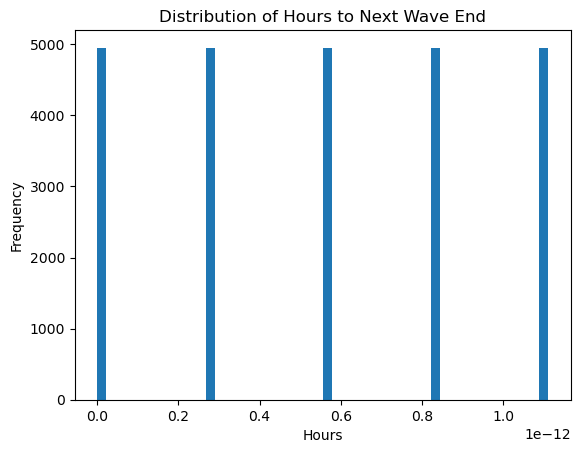

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_hours_seq, bins=50)
plt.title("Distribution of Hours to Next Wave End")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()


In [ ]:
model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',
        'pv_output': 'binary_crossentropy',
        'hours_output': 'mse'
    },
    loss_weights={
        'wave_output': 1.0,
        'pv_output': 1.0,
        'hours_output': 5.0  # ← وزن بیشتر به زمان موج بعدی
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)


In [ ]:
print("X_seq shape:", X_seq.shape)
print("y_wave_seq shape:", y_wave_seq.shape)
print("y_pv_seq_categorical shape:", y_pv_seq_categorical.shape)
print("y_hours_scaled shape:", y_hours_scaled.shape)


X_seq shape: (24754, 90, 24)
y_wave_seq shape: (24754,)
y_pv_seq_categorical shape: (24754, 2)
y_hours_scaled shape: (24754,)


In [ ]:
# تغییر لایه خروجی pv_output به شکل زیر:
out_pv = Dense(16, activation='relu')(x)
out_pv = Dense(1, activation='sigmoid', name='pv_output')(out_pv)

# کامپایل:
model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',
        'pv_output': 'binary_crossentropy',
        'hours_output': 'mse'
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

sequence_length = 90
feature_dim = 24  # فرض کردم 24 ویژگی داری، طبق شکل X_seq

input_layer = Input(shape=(sequence_length, feature_dim))

x = LSTM(64, return_sequences=False)(input_layer)
x = Dropout(0.3)(x)

# خروجی 1: طبقه‌بندی موج (5 کلاس)
out_wave = Dense(32, activation='relu')(x)
out_wave = Dense(5, activation='softmax', name='wave_output')(out_wave)  # 5 کلاس

# خروجی 2: طبقه‌بندی قله/دره (دوتا کلاس با sigmoid)
out_pv = Dense(16, activation='relu')(x)
out_pv = Dense(1, activation='sigmoid', name='pv_output')(out_pv)

# خروجی 3: رگرسیون ساعت باقی‌مانده (یک عدد حقیقی)
out_hours = Dense(16, activation='relu')(x)
out_hours = Dense(1, activation='linear', name='hours_output')(out_hours)

model = Model(inputs=input_layer, outputs=[out_wave, out_pv, out_hours])

model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',  # برچسب y_wave_seq باید عدد صحیح باشه
        'pv_output': 'binary_crossentropy',                # برچسب y_pv_seq باید 0 یا 1 باشه
        'hours_output': 'mse'
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)

model.summary()

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_seq,
    {
        'wave_output': y_wave_seq,    # shape (24754,), int labels 0..4
        'pv_output': y_pv_seq,        # shape (24754,), 0 or 1, int or float
        'hours_output': y_hours_scaled  # shape (24754, 1)
    },
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 90, 24)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     22,784 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │      1,040 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │      1,040 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wave_output (Dense) │ (None, 5)         │        165 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pv_output (Dense)   │ (None, 1)         │         17 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hours_output        │ (None, 1)         │         17 │ dense_6[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,143 (106.03 KB)

 Trainable params: 27,143 (106.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
697/697 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - hours_output_loss: 0.1421 - hours_output_mae: 0.3200 - loss: 2.4321 - pv_output_accuracy: 0.5947 - pv_output_loss: 0.6760 - wave_output_accuracy: 0.1954 - wave_output_loss: 1.6140 - val_hours_output_loss: 0.1255 - val_hours_output_mae: 0.3039 - val_loss: 2.4080 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6732 - val_wave_output_accuracy: 0.2019 - val_wave_output_loss: 1.6095
Epoch 2/50
697/697 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - hours_output_loss: 0.1281 - hours_output_mae: 0.3090 - loss: 2.4130 - pv_output_accuracy: 0.5985 - pv_output_loss: 0.6744 - wave_output_accuracy: 0.1983 - wave_output_loss: 1.6105 - val_hours_output_loss: 0.1250 - val_hours_output_mae: 0.3015 - val_loss: 2.4074 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6730 - val_wave_output_accuracy: 0.1995 - val_wave_output_loss: 1.6095
Epoch 3/50
697/697 ━━━━━━━━━━━━━━━━━━━━ 63s 90ms/step - hours_output_loss: 0.1262 - hours_output_mae: 0.3056

In [ ]:
preds = model.predict(X_seq[:20])
pred_wave = preds[0].argmax(axis=1)
pred_pv = (preds[1] > 0.5).astype(int).flatten()
pred_hours = preds[2].flatten()

for i in range(20):
    print(f"{i+1:2d}: Peak/Valley → {pred_pv[i]}, Wave → {pred_wave[i]}, Ends in {pred_hours[i]:.2f} hours")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
 1: Peak/Valley → 1, Wave → 0, Ends in 0.76 hours
 2: Peak/Valley → 0, Wave → 1, Ends in 0.46 hours
 3: Peak/Valley → 1, Wave → 2, Ends in 0.25 hours
 4: Peak/Valley → 0, Wave → 3, Ends in 0.01 hours
 5: Peak/Valley → 0, Wave → 4, Ends in 1.00 hours
 6: Peak/Valley → 1, Wave → 0, Ends in 0.77 hours
 7: Peak/Valley → 0, Wave → 1, Ends in 0.53 hours
 8: Peak/Valley → 1, Wave → 2, Ends in 0.24 hours
 9: Peak/Valley → 0, Wave → 3, Ends in -0.02 hours
10: Peak/Valley → 0, Wave → 4, Ends in 1.02 hours
11: Peak/Valley → 1, Wave → 0, Ends in 0.77 hours
12: Peak/Valley → 0, Wave → 1, Ends in 0.47 hours
13: Peak/Valley → 1, Wave → 2, Ends in 0.24 hours
14: Peak/Valley → 0, Wave → 3, Ends in -0.01 hours
15: Peak/Valley → 0, Wave → 4, Ends in 1.00 hours
16: Peak/Valley → 1, Wave → 0, Ends in 0.76 hours
17: Peak/Valley → 0, Wave → 1, Ends in 0.49 hours
18: Peak/Valley → 1, Wave → 2, Ends in 0.24 hours
19: Peak/Valley → 0, Wave → 3, Ends in -0.01 hours
20: Peak

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

# مرحله 1 و 2: تعریف مدل دیفیوژن شرطی ساده (MLP)
def build_diffusion_predictor():
    # ورودی نویز یک عدد اسکالر (مثلاً نمونه‌ای از نویز گوسی)
    noise_input = Input(shape=(1,), name='noise_input')

    # ورودی embedding مدل LSTM به عنوان شرط، بردار 64 بعدی
    condition_input = Input(shape=(64,), name='condition_input')

    # ترکیب نویز و embedding به صورت کانکت (ادغام)
    x = Concatenate()([noise_input, condition_input])

    # چند لایه Dense با فعالسازی ReLU
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    # خروجی: مقدار عددی پیش‌بینی شده (زمان تمیز باقی‌مانده)
    out = Dense(1, name='predicted_clean')(x)

    # ساخت مدل با دو ورودی و یک خروجی
    model = Model(inputs=[noise_input, condition_input], outputs=out, name='diffusion_predictor')

    return model

# ساخت مدل
diffusion_model = build_diffusion_predictor()
diffusion_model.summary()


Model: "diffusion_predictor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ noise_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition_input     │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 65)        │          0 │ noise_input[0][0… │
│ (Concatenate)       │                   │            │ condition_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      8,448 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     16,512 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ predicted_clean     │ (None, 1)         │        129 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 25,089 (98.00 KB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

T = 1000  # تعداد تایم استپ‌های انتشار

# ساخت آرایه‌ی alpha_t (سری کاهش نویز)
beta_start = 0.0001
beta_end = 0.02
beta = np.linspace(beta_start, beta_end, T, dtype=np.float32)  # افزایش تدریجی نویز
alpha = 1 - beta
alpha_bar = np.cumprod(alpha)  # ᾱ_t = ∏_{s=1}^t α_s

# تابع نمونه‌گیری x_t از x_0 و نویز
def q_sample(x0, t, noise):
    """
    x0: مقدار تمیز واقعی (batch_size, 1)
    t: timestep (batch_size,), عدد صحیح بین 0 تا T-1
    noise: نویز نمونه‌گیری شده (batch_size, 1)
    """
    sqrt_alpha_bar = np.sqrt(alpha_bar[t])[:, None]  # به شکل (batch_size, 1)
    sqrt_one_minus_alpha_bar = np.sqrt(1 - alpha_bar[t])[:, None]
    
    return sqrt_alpha_bar * x0 + sqrt_one_minus_alpha_bar * noise

# تبدیل numpy به tf
import tensorflow as tf

def q_sample_tf(x0, t, noise):
    sqrt_alpha_bar_t = tf.gather(tf.sqrt(alpha_bar), t)[:, None]
    sqrt_one_minus_alpha_bar_t = tf.sqrt(1 - tf.gather(alpha_bar, t))[:, None]
    return sqrt_alpha_bar_t * x0 + sqrt_one_minus_alpha_bar_t * noise

# مثال ساده حلقه آموزش
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
mse_loss = tf.keras.losses.MeanSquaredError()

@tf.function
def train_step(x0_batch, condition_batch):
    batch_size = tf.shape(x0_batch)[0]
    t = tf.random.uniform((batch_size,), minval=0, maxval=T, dtype=tf.int32)  # تایم استپ تصادفی
    noise = tf.random.normal(tf.shape(x0_batch))
    
    # ساخت x_t noisy
    x_t = q_sample_tf(x0_batch, t, noise)
    
    with tf.GradientTape() as tape:
        noise_pred = diffusion_model([x_t, condition_batch], training=True)  # پیش‌بینی نویز
        loss = mse_loss(noise, noise_pred)
    gradients = tape.gradient(loss, diffusion_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, diffusion_model.trainable_variables))
    return loss

# حالا برای آموزش، باید دسته‌هایی از داده‌ها (x0, condition) آماده کنیم


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Reshape, Dense, LSTM, Input
from tensorflow.keras.models import Model

# فرض: embedding شرط (shape = (None, 64))
cond_input = Input(shape=(64,), name='condition_embedding')

# فرض: ورودی دیفیوژن (شکل (None, 1)) که مقدار ساعت باقی‌مانده با نویز هست
diff_input = Input(shape=(1,), name='diffusion_input')

# ترکیب ورودی و شرط
x = Concatenate()([diff_input, cond_input])  # (batch_size, 1+64=65)
x = Dense(64, activation='relu')(x)

# به جای tf.expand_dims، از Reshape استفاده کن:
x = Reshape((1, 64))(x)

# یا با Lambda:
# x = Lambda(lambda t: tf.expand_dims(t, axis=1))(x)

x = LSTM(64, return_sequences=False)(x)# خروجی نهایی، مقدار ساعت بدون نویز
output = Dense(1, activation='linear')(x)

diff_model = Model(inputs=[diff_input, cond_input], outputs=output)
diff_model.compile(optimizer='adam', loss='mse')

diff_model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ diffusion_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition_embedding │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 65)        │          0 │ diffusion_input[… │
│ (Concatenate)       │                   │            │ condition_embedd… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      4,224 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 64)     │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     33,024 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │         65 │ lstm_3[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 37,313 (145.75 KB)

 Trainable params: 37,313 (145.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# پیدا کردن نقاط شروع موج‌ها
wave_changes = wave_df['Wave_Label'].diff() != 0
start_indices = wave_df.index[wave_changes].tolist()
start_indices.append(wave_df.index[-1] + 1)  # برای راحتی، انتهای داده رو اضافه می‌کنیم

# ساخت آرایه برای remaining_hours
remaining_hours = np.zeros(len(wave_df))

for i in range(len(start_indices)-1):
    start = start_indices[i]
    end = start_indices[i+1] - 1
    length = end - start + 1
    # برای هر ردیف، فاصله تا پایان موج فعلی (end - current_index)
    for idx in range(start, end + 1):
        remaining_hours[idx] = length - (idx - start)

# اضافه کردن به دیتافریم
wave_df['remaining_hours'] = remaining_hours


In [ ]:
X_seq = X_seq.astype(np.float32)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

sequence_length = 90
feature_dim = 24

input_layer = Input(shape=(sequence_length, feature_dim))

# لایه LSTM
x = LSTM(64, return_sequences=False)(input_layer)

# گرفتن embedding قبل از Dropout
embedding_output = x

# ادامه مدل با Dropout و خروجی‌ها
drop = Dropout(0.3)(embedding_output)

# خروجی 1: طبقه‌بندی موج (5 کلاس)
out_wave = Dense(32, activation='relu')(drop)
out_wave = Dense(5, activation='softmax', name='wave_output')(out_wave)

# خروجی 2: طبقه‌بندی قله/دره (دوتا کلاس)
out_pv = Dense(16, activation='relu')(drop)
out_pv = Dense(1, activation='sigmoid', name='pv_output')(out_pv)

# خروجی 3: رگرسیون ساعت باقی‌مانده
out_hours = Dense(16, activation='relu')(drop)
out_hours = Dense(1, activation='linear', name='hours_output')(out_hours)

# مدل اصلی با سه خروجی
model = Model(inputs=input_layer, outputs=[out_wave, out_pv, out_hours])

model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',
        'pv_output': 'binary_crossentropy',
        'hours_output': 'mse'
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)

# مدل embedding برای استخراج خروجی LSTM بدون Dropout
embedding_model = Model(inputs=input_layer, outputs=embedding_output)

# summary مدل اصلی
model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 90, 24)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 64)        │     22,784 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 16)        │      1,040 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 16)        │      1,040 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wave_output (Dense) │ (None, 5)         │        165 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pv_output (Dense)   │ (None, 1)         │         17 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hours_output        │ (None, 1)         │         17 │ dense_16[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,143 (106.03 KB)

 Trainable params: 27,143 (106.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_seq_embedding = embedding_model.predict(X_seq.astype('float32'))  


774/774 ━━━━━━━━━━━━━━━━━━━━ 58s 71ms/step


In [ ]:
embedding_model = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)  
X_seq_embedding = embedding_model.predict(X_seq, batch_size=64) 

387/387 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step


In [ ]:
import numpy as np

diffusion_clean = y_hours_scaled

# اضافه کردن نویز گوسی با انحراف معیار 0.1 
noise = np.random.normal(loc=0.0, scale=0.1, size=diffusion_clean.shape)
diffusion_noisy = diffusion_clean + noise


In [ ]:
from tensorflow.keras.layers import Concatenate

input_noisy = tf.keras.Input(shape=(1,), name='noisy_hours')
input_embed = tf.keras.Input(shape=(64,), name='embedding')

x = Concatenate()([input_noisy, input_embed])
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='linear')(x)

diff_model = tf.keras.Model(inputs=[input_noisy, input_embed], outputs=output)

diff_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
diff_model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ noisy_hours         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 65)        │          0 │ noisy_hours[0][0… │
│ (Concatenate)       │                   │            │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 128)       │      8,448 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 64)        │      8,256 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 1)         │         65 │ dense_21[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = diff_model.fit(
    [diffusion_noisy, X_seq_embedding],
    diffusion_clean,
    batch_size=64,
    epochs=50,
    validation_split=0.1,
    callbacks=[early_stopping]
)


Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0441 - mae: 0.1342 - val_loss: 0.0107 - val_mae: 0.0833
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0087 - mae: 0.0723 - val_loss: 0.0089 - val_mae: 0.0736
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086 - mae: 0.0710 - val_loss: 0.0093 - val_mae: 0.0743
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - mae: 0.0702 - val_loss: 0.0089 - val_mae: 0.0736
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - mae: 0.0696 - val_loss: 0.0087 - val_mae: 0.0720
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - mae: 0.0687 - val_loss: 0.0087 - val_mae: 0.0708
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0084 - mae: 0.0695 - val_loss: 0.0098 - val_mae: 0.0750
Epoch 8/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086 - mae: 0.0705 - val_loss: 0.0103 - val_mae: 0.0782
Epoch 9/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

embedding_dim = 64

# ورودی‌های مدل: نویز و شرط
noisy_input = Input(shape=(embedding_dim,), name='noisy_input')
condition_input = Input(shape=(embedding_dim,), name='condition_input')

# ادغام نویز و شرط
merged = Concatenate()([noisy_input, condition_input])  # shape = (128,)

# شبکه بازسازی‌کننده
x = Dense(128, activation='relu')(merged)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='linear')(x)  # خروجی نهایی

# ساخت مدل
diff_model = Model(inputs=[noisy_input, condition_input], outputs=output)
diff_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# ایجاد نسخه نویزی از embeddingها
noise_factor = 0.1
diffusion_noisy = X_seq_embedding + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=X_seq_embedding.shape
)

# هدف، نسخه تمیز embedding است
diffusion_clean = X_seq_embedding.copy()


In [ ]:
print("diffusion_noisy shape:", diffusion_noisy.shape)
print("diffusion_clean shape:", diffusion_clean.shape)


diffusion_noisy shape: (24754, 64)
diffusion_clean shape: (24754, 64)


In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Concatenate

# ورودی نویزی و embedding اصلی
input_noisy = Input(shape=(64,), name='noisy_input')
input_cond = Input(shape=(64,), name='conditional_embedding')

# ترکیب نویز و embedding شرطی
x = Concatenate()([input_noisy, input_cond])  # شکل نهایی: (128,)

# شبکه ساده برای denoising
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(64, activation='linear')(x)

diff_model = Model(inputs=[input_noisy, input_cond], outputs=output)
diff_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# ایجاد دوباره نویز روی embedding اصلی
noise_factor = 0.1
diffusion_noisy = X_seq_embedding + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=X_seq_embedding.shape
)

# هدف: نسخه تمیز embedding
diffusion_clean = X_seq_embedding.copy()

# آموزش
history = diff_model.fit(
    [diffusion_noisy, X_seq_embedding],
    diffusion_clean,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0028 - mae: 0.0328 - val_loss: 6.0629e-04 - val_mae: 0.0188
Epoch 2/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4022e-04 - mae: 0.0091 - val_loss: 3.7508e-04 - val_mae: 0.0144
Epoch 3/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.3920e-05 - mae: 0.0066 - val_loss: 3.0127e-04 - val_mae: 0.0128
Epoch 4/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.2410e-05 - mae: 0.0055 - val_loss: 2.4354e-04 - val_mae: 0.0114
Epoch 5/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.1050e-05 - mae: 0.0049 - val_loss: 2.1327e-04 - val_mae: 0.0107
Epoch 6/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.2494e-05 - mae: 0.0044 - val_loss: 1.9598e-04 - val_mae: 0.0102
Epoch 7/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.7651e-05 - mae: 0.0040 - val_loss: 1.8837e-04 - val_mae: 0.0101
Epoch 8/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3251e-05 - mae: 0.0037 - val_loss: 1.7952e-04 - val_mae: 0.0

In [ ]:
current_embedding = X_seq_embedding[-1]  

In [ ]:
num_scenarios = 5
noise_factor = 0.1

noisy_scenarios = np.array([
    current_embedding + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=current_embedding.shape)
    for _ in range(num_scenarios)
])


In [ ]:
# مدل دیفیوژن می‌خواد ورودی دوم رو هم داشته باشه (شرط)
reconstructed_scenarios = diff_model.predict([noisy_scenarios, np.repeat(current_embedding[np.newaxis, :], num_scenarios, axis=0)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step


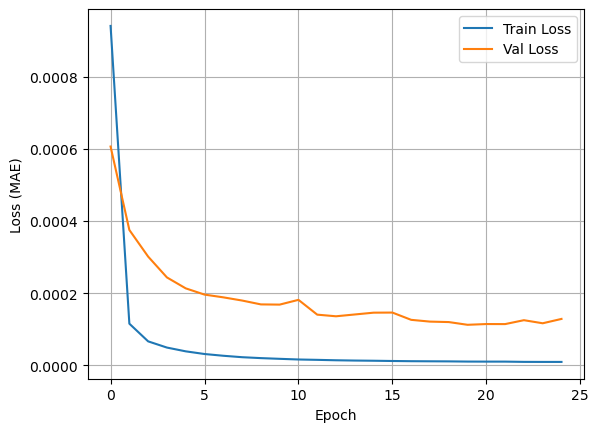

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MAE)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_results = diff_model.evaluate([diffusion_noisy_test, X_seq_embedding_test], diffusion_clean_test)
print("Test Loss (MAE):", test_results)


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3883 - mae: 0.5178
Test Loss (MAE): [0.39240762591362, 0.5201271772384644]


In [ ]:
# embedding فعلی
current_embedding = X_seq_embedding_test[-1]  
n_scenarios = 5
noise_factor = 0.1

generated_embeddings = []

for i in range(n_scenarios):
    noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=current_embedding.shape)
    noisy_input = current_embedding + noise
    cleaned_embedding = diff_model.predict([np.expand_dims(noisy_input, axis=0),
                                            np.expand_dims(current_embedding, axis=0)], verbose=0)
    generated_embeddings.append(cleaned_embedding.squeeze())



In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout

# ورودی embedding
embedding_input = Input(shape=(64,), name='embedding_input')

# لایه‌های مشترک
x = Dense(128, activation='relu')(embedding_input)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# خروجی 1: نوع موج (5 کلاس)
output_wave = Dense(5, activation='softmax', name='wave_output')(x)

# خروجی 2: قله یا دره (باینری)
output_pv = Dense(1, activation='sigmoid', name='pv_output')(x)

# خروجی 3: مدت زمان باقی‌مانده
output_hours = Dense(1, activation='linear', name='hours_output')(x)

# مدل نهایی
wave_classifier_model = Model(inputs=embedding_input, outputs=[output_wave, output_pv, output_hours])

# کامپایل مدل
wave_classifier_model.compile(
    optimizer='adam',
    loss={
        'wave_output': 'sparse_categorical_crossentropy',
        'pv_output': 'binary_crossentropy',
        'hours_output': 'mse'
    },
    metrics={
        'wave_output': 'accuracy',
        'pv_output': 'accuracy',
        'hours_output': 'mae'
    }
)

wave_classifier_model.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ embedding_input     │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 128)       │      8,320 │ embedding_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_35[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 64)        │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wave_output (Dense) │ (None, 5)         │        325 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pv_output (Dense)   │ (None, 1)         │         65 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hours_output        │ (None, 1)         │         65 │ dense_36[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 17,031 (66.53 KB)

 Trainable params: 17,031 (66.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = wave_classifier_model.fit(
    X_seq_embedding,
    {
        'wave_output': y_wave,
        'pv_output': y_pv,
        'hours_output': y_hours
    },
    batch_size=32,
    epochs=30,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)


Epoch 1/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - hours_output_loss: 0.0016 - hours_output_mae: 0.0281 - loss: 2.2881 - pv_output_accuracy: 0.5982 - pv_output_loss: 0.6752 - wave_output_accuracy: 0.1996 - wave_output_loss: 1.6113 - val_hours_output_loss: 5.5796e-05 - val_hours_output_mae: 0.0053 - val_loss: 2.2827 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6731 - val_wave_output_accuracy: 0.1999 - val_wave_output_loss: 1.6096
Epoch 2/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - hours_output_loss: 9.4068e-05 - hours_output_mae: 0.0076 - loss: 2.2859 - pv_output_accuracy: 0.5960 - pv_output_loss: 0.6755 - wave_output_accuracy: 0.1967 - wave_output_loss: 1.6103 - val_hours_output_loss: 1.0351e-05 - val_hours_output_mae: 0.0025 - val_loss: 2.2824 - val_pv_output_accuracy: 0.6002 - val_pv_output_loss: 0.6731 - val_wave_output_accuracy: 0.2011 - val_wave_output_loss: 1.6094
Epoch 3/30
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - hours_output_loss: 3.1760e-05 - hours_output_m

In [ ]:
import numpy as np

# تبدیل به آرایه Numpy
generated_embeddings_array = np.array(generated_embeddings)  # شکل: (5, 64)

# پیش‌بینی
predictions = wave_classifier_model.predict(generated_embeddings_array)

# جدا کردن خروجی‌ها
y_wave_pred, y_pv_pred, y_hours_pred = predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


In [ ]:
for i in range(len(generated_embeddings_array)):
    wave_class = np.argmax(y_wave_pred[i])  # کدام کلاس موج
    pv_label = int(y_pv_pred[i] > 0.5)       # قله یا دره (0 یا 1)
    hours_left = float(y_hours_pred[i])      # مدت زمان باقی‌مانده
    
    print(f"🌀 سناریو {i+1}:")
    print(f"  - نوع موج (wave): {wave_class}")
    print(f"  - قله یا دره (peak/valley): {pv_label}")
    print(f"  - زمان باقی‌مانده تا پایان موج: {hours_left:.2f} ساعت")
    print("-" * 40)


🌀 سناریو 1:
  - نوع موج (wave): 4
  - قله یا دره (peak/valley): 0
  - زمان باقی‌مانده تا پایان موج: -0.00 ساعت
----------------------------------------
🌀 سناریو 2:
  - نوع موج (wave): 4
  - قله یا دره (peak/valley): 0
  - زمان باقی‌مانده تا پایان موج: -0.00 ساعت
----------------------------------------
🌀 سناریو 3:
  - نوع موج (wave): 4
  - قله یا دره (peak/valley): 0
  - زمان باقی‌مانده تا پایان موج: -0.00 ساعت
----------------------------------------
🌀 سناریو 4:
  - نوع موج (wave): 4
  - قله یا دره (peak/valley): 0
  - زمان باقی‌مانده تا پایان موج: -0.00 ساعت
----------------------------------------
🌀 سناریو 5:
  - نوع موج (wave): 4
  - قله یا دره (peak/valley): 0
  - زمان باقی‌مانده تا پایان موج: -0.00 ساعت
----------------------------------------


C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\134692722.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pv_label = int(y_pv_pred[i] > 0.5)       # قله یا دره (0 یا 1)
C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\134692722.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hours_left = float(y_hours_pred[i])      # مدت زمان باقی‌مانده


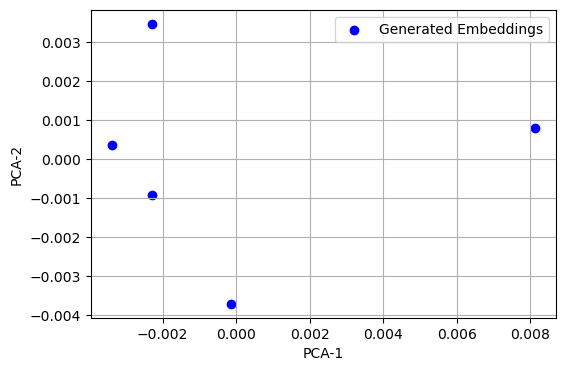

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(np.array(generated_embeddings))

plt.figure(figsize=(6, 4))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Generated Embeddings')
plt.title("")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
all_results = []

for idx in range(0, len(X_seq_embedding), 100):  
    embedding_sample = X_seq_embedding[idx:idx+1]  

    # تولید سناریو
    noisy_input = embedding_sample + 0.1 * np.random.normal(size=embedding_sample.shape)
    repeated_noisy = np.repeat(noisy_input, 5, axis=0)
    repeated_cond = np.repeat(embedding_sample, 5, axis=0)

    # پیش‌بینی با دیفیوژن
    generated_embeddings = diff_model.predict([repeated_noisy, repeated_cond])

    # پیش‌بینی خروجی‌ها
    wave_pred, pv_pred, hours_pred = wave_classifier_model.predict(generated_embeddings)

    # جمع‌آوری
    for i in range(5):
        all_results.append({
            'index': idx,
            'scenario': i+1,
            'wave': int(np.argmax(wave_pred[i])),
            'pv': int(pv_pred[i] > 0.5),
            'hours_left': float(hours_pred[i]),
        })


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\110454569.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'pv': int(pv_pred[i] > 0.5),
C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\110454569.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'hours_left': float(hours_pred[i]),


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━

In [ ]:
import pandas as pd

# ساخت دیتافریم از لیست دیکشنری‌ها
df_results = pd.DataFrame(all_results)

# نمایش چند ردیف اول جدول
print(df_results.head())


   index  scenario  wave  pv  hours_left
0      0         1     1   0   -0.001124
1      0         2     1   0   -0.001124
2      0         3     1   0   -0.001124
3      0         4     1   0   -0.001124
4      0         5     1   0   -0.001124


In [ ]:
num_samples = 5   # تعداد نمونه‌هایی که می‌خوای بررسی کنی
num_scenarios = 5 # تعداد سناریو برای هر نمونه

results = []

for sample_idx in range(num_samples):
    original_embedding = X_seq_embedding[sample_idx]  # انتخاب embedding نمونه
    scenario_embeddings = []
    
    for _ in range(num_scenarios):
        noisy_embedding = original_embedding + noise_factor * np.random.normal(
            loc=0.0, scale=1.0, size=original_embedding.shape
        )
        scenario_embeddings.append(noisy_embedding)
    
    scenario_embeddings = np.array(scenario_embeddings)
    
    # پیش‌بینی با مدل موج (wave_classifier_model) یا مدل‌های مرتبط
    y_wave_pred, y_pv_pred, y_hours_pred = wave_classifier_model.predict(scenario_embeddings)
    
    for i in range(num_scenarios):
        wave_label = int(np.argmax(y_wave_pred[i]))
        pv_label = int(y_pv_pred[i] > 0.5)
        hours_left = float(y_hours_pred[i])
        
        results.append({
            "index": sample_idx,
            "scenario": i + 1,
            "wave": wave_label,
            "pv": pv_label,
            "hours_left": hours_left,
        })

import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\1380578877.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pv_label = int(y_pv_pred[i] > 0.5)
C:\Users\amirhossein\AppData\Local\Temp\ipykernel_14380\1380578877.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hours_left = float(y_hours_pred[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
    index  scenario  wave  pv  hours_left
0       0         1     0   0   -0.000952
1       0         2     0   0   -0.001063
2       0         3     4   0    0.000114
3       0         4     1   1   -0.001584
4       0         5     1   1   -0.004657
5       1         1     0   1    0.002493
6       1         2     0   1   -0.001102
7       1         3     2   0    0.000432
8       1         4     4   0   -0.000315
9       1         5     0   0   -0.001200
10      2         1     1   0   -0.000009
11      2         2     0   1   -0.001337
12      2         3     1   0   -0.000254
13      2         4     0   1   -0.002646
14      2         5     1   0   -0.001124
15      3         1     4   0    0.000356
16      3         2     0   1    0.000804
17      3         3     0   0   -0.000872
18      3         4     1   0   -0.000136
19      3         5     4   0   -0.000140
20 

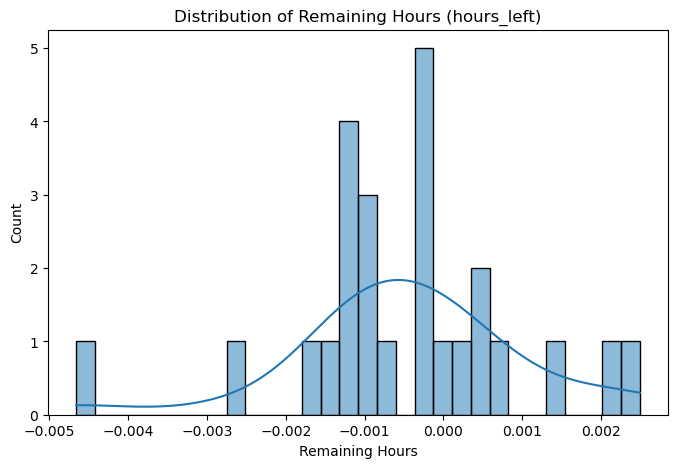

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_results['hours_left'], bins=30, kde=True)
plt.title('Distribution of Remaining Hours (hours_left)')
plt.xlabel('Remaining Hours')
plt.ylabel('Count')
plt.show()


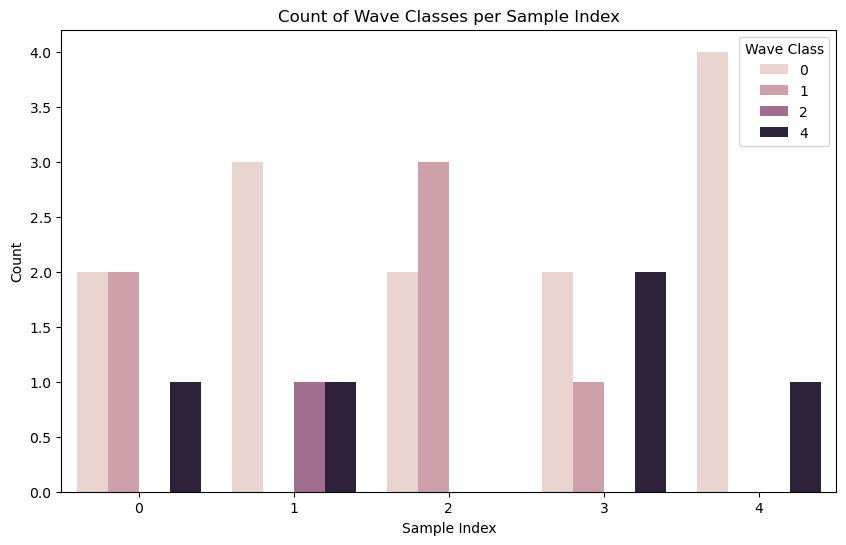

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_results, x='index', hue='wave')
plt.title('Count of Wave Classes per Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.legend(title='Wave Class')
plt.show()


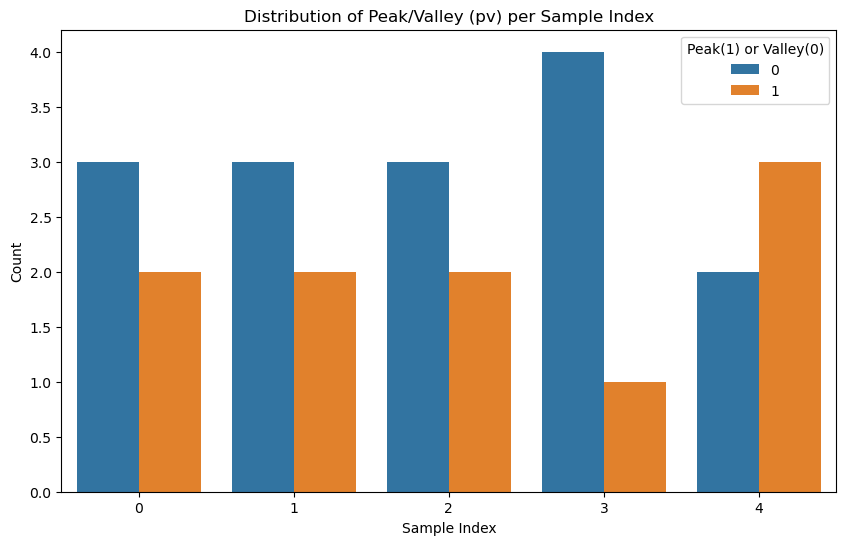

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_results, x='index', hue='pv')
plt.title('Distribution of Peak/Valley (pv) per Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Count')
plt.legend(title='Peak(1) or Valley(0)')
plt.show()


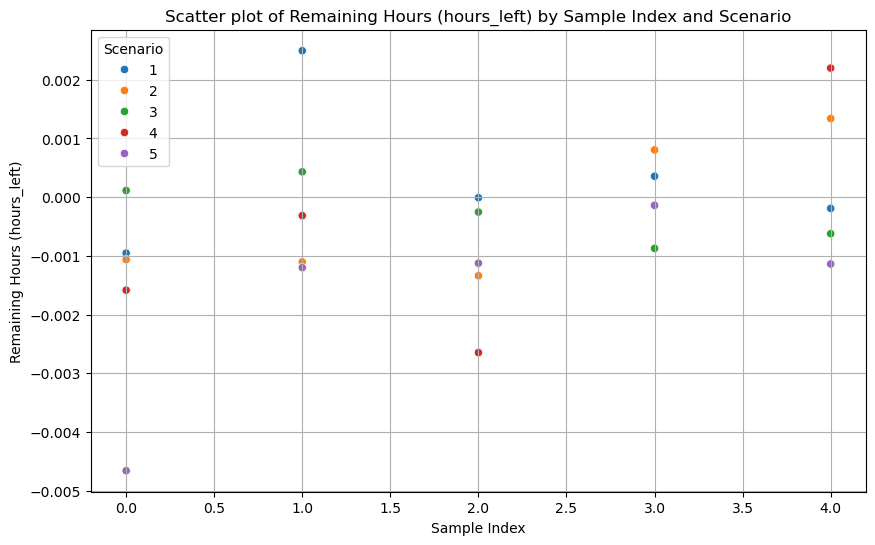

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_results, x='index', y='hours_left', hue='scenario', palette='tab10')
plt.title('Scatter plot of Remaining Hours (hours_left) by Sample Index and Scenario')
plt.xlabel('Sample Index')
plt.ylabel('Remaining Hours (hours_left)')
plt.legend(title='Scenario')
plt.grid(True)
plt.show()
